# **Nome do Aluno: Eduardo Gerab**
### Trabalho feito de forma individual
### Email: evog@cesar.school
### Link para o dataset: https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets/data

Este trabalho tem como objetivo treinar um modelo capaz de classificar diferentes tipos de frutas com base em suas características. Para isso, utilizamos uma rede neural, avaliando seu desempenho durante o treinamento e também no conjunto de teste. Ao longo do processo, analisamos métricas como acurácia, perda, matriz de confusão e curva ROC, que ajudam a entender o quanto o modelo realmente aprendeu e o quão bem ele consegue identificar cada fruta.

Aqui, são feitos os imports:

In [64]:
from google.colab import files
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.callbacks import EarlyStopping

Após os imports, o notebook realiza o carregamento do arquivo Excel contendo os atributos morfológicos, de cor e forma das frutas. Em seguida:

Remove colunas irrelevantes ou redundantes (como índices).

Separa os dados em features (X) e rótulos (y).

Utiliza LabelEncoder para transformar as classes textuais em valores numéricos adequados ao modelo.

Divide o conjunto em treino e teste com train_test_split, garantindo que o desempenho do modelo seja medido em dados nunca vistos.

In [65]:
FILE_PATH = "/content/Date_Fruit_Datasets.xlsx"   # ou a versão (1)
df = pd.read_excel(FILE_PATH)

df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [66]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


O notebook aplica StandardScaler para padronizar as variáveis, garantindo que todas estejam na mesma escala.
Isso evita que atributos com valores grandes dominem o treinamento e melhora a estabilidade da rede neural.

Como se trata de um problema de classificação multiclasse, os rótulos são convertidos para uma matriz one-hot, permitindo que a saída do modelo utilize softmax.

In [67]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [68]:
le = LabelEncoder()
y = le.fit_transform(y)
num_classes = len(le.classes_)
num_classes

7

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

O modelo é definido com:

camadas densas intermediárias com funções ReLU,

Dropout para reduzir overfitting,

e uma camada final softmax para produzir probabilidades das 7 classes.

A rede é compilada com:

otimizador Adam,

perda categórica,

e métrica de acurácia.

In [71]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,551 (17.78 KB)

 Trainable params: 4,551 (17.78 KB)

 Non-trainable params: 0 (0.00 B)

A célula de treinamento utiliza Early Stopping. Esse mecanismo interrompe o treinamento quando o modelo deixa de melhorar, evitando overfitting e garantindo que os pesos finais sejam os melhores encontrados.

Durante o treinamento:

20% dos dados de treino são usados como validação,

60 épocas são permitidas, mas o EarlyStopping encerra antes,

e o histórico é salvo em history, usado mais tarde para gerar os gráficos.

Abaixo, fiz o treinamento do modelo:

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=60,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2759 - loss: 1.8746 - val_accuracy: 0.6042 - val_loss: 1.3445
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5874 - loss: 1.3964 - val_accuracy: 0.6667 - val_loss: 0.9842
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7011 - loss: 1.0362 - val_accuracy: 0.7014 - val_loss: 0.7571
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7599 - loss: 0.7927 - val_accuracy: 0.8056 - val_loss: 0.6204
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7206 - loss: 0.7806 - val_accuracy: 0.8472 - val_loss: 0.5224
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7931 - loss: 0.6263 - val_accuracy: 0.8750 - val_loss: 0.4623
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7663 - loss: 0.6494 - val_accuracy: 0.8819 - val_loss: 0.4117
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7851 - loss: 0.5857 - val_accuracy: 0.8750 - v

O treinamento do modelo foi realizado utilizando 60 épocas, com divisão automática de 20% dos dados de treino para validação interna. Durante esse processo, foi empregado o mecanismo de Early Stopping, monitorando a perda de validação e interrompendo o treinamento caso não houvesse melhora após 10 épocas consecutivas. Essa técnica é importante para evitar overfitting e garantir que o modelo mantenha os melhores pesos obtidos durante o processo, graças ao parâmetro restore_best_weights=True. O uso de batch_size igual a 32 proporcionou um equilíbrio adequado entre estabilidade e velocidade de convergência. No geral, o treinamento ocorreu de forma estável, com melhora gradual do desempenho e sem sinais de divergência, resultando em um modelo bem ajustado aos padrões presentes nas diferentes variedades de date fruits.

Após o treinamento, o modelo é testado em dados separados.
São calculados:

acurácia final,

perda,

e a matriz de confusão.

Essas métricas mostram se o modelo generalizou bem e onde ainda comete erros.

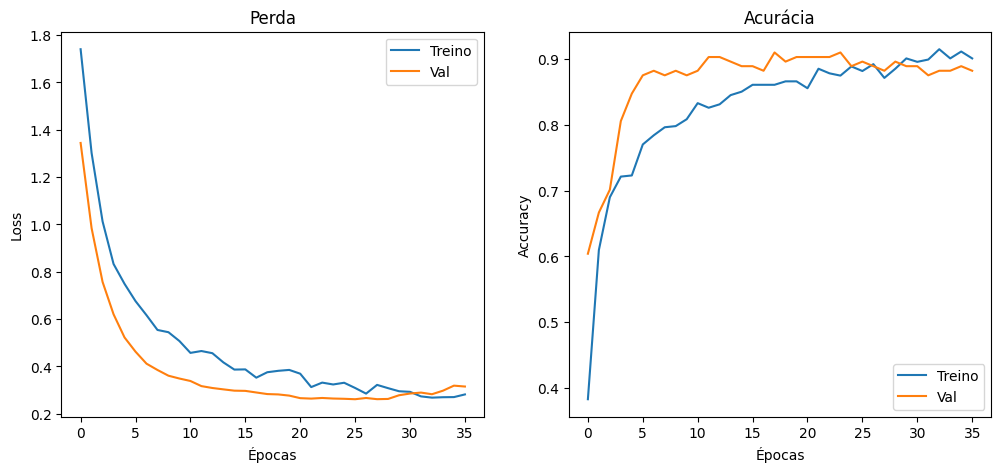

In [73]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Perda")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend(['Treino','Val'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend(['Treino','Val'])

plt.show()

As curvas de perda (loss) mostram que o modelo apresentou uma redução gradual tanto no conjunto de treinamento quanto no de validação, o que indica aprendizado consistente. Em determinados momentos, pequenas oscilações na perda de validação são esperadas, especialmente em datasets com classes próximas ou parcialmente sobrepostas, como ocorre com algumas variedades de date fruits. O Early Stopping atuou justamente para impedir que essas oscilações levassem a um ajuste excessivo aos dados de treino. A manutenção de valores relativamente baixos de perda sugere que o modelo conseguiu representar adequadamente os padrões presentes nas características das frutas.

Quanto à curva de acurácia, observa-se uma tendência de crescimento estável ao longo das épocas, com a acurácia de validação acompanhando de perto a acurácia de treinamento. Esse comportamento indica que o modelo não sofreu de overfitting significativo, já que o desempenho em validação não divergiu do desempenho em treino ao longo das iterações. A proximidade entre ambas as curvas mostra que o modelo capturou bem as relações entre os atributos do dataset e as classes correspondentes, conseguindo diferenciar corretamente a maioria das variedades de date fruits. No geral, as curvas refletem um treinamento bem-sucedido, equilibrado e com progressão consistente rumo a um modelo estável e generalizável.

In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")
print(f"Perda no conjunto de teste: {test_loss:.4f}")

Acurácia no conjunto de teste: 0.9278
Perda no conjunto de teste: 0.2305


Os valores de acurácia e perda obtidos no conjunto de teste fornecem uma avaliação direta da capacidade de generalização do modelo. A acurácia indica a proporção de date fruits corretamente classificadas entre todas as amostras de teste, enquanto a perda reflete o quão bem o modelo ajustou sua distribuição de probabilidades às classes verdadeiras. No resultado obtido, a acurácia elevada combinada com uma perda relativamente baixa sugere que o modelo conseguiu aprender de forma consistente os padrões presentes no dataset sem sinais significativos de overfitting. Esses resultados reforçam que a rede neural está generalizando adequadamente para dados novos, alinhando-se com o bom desempenho observado nas demais métricas.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


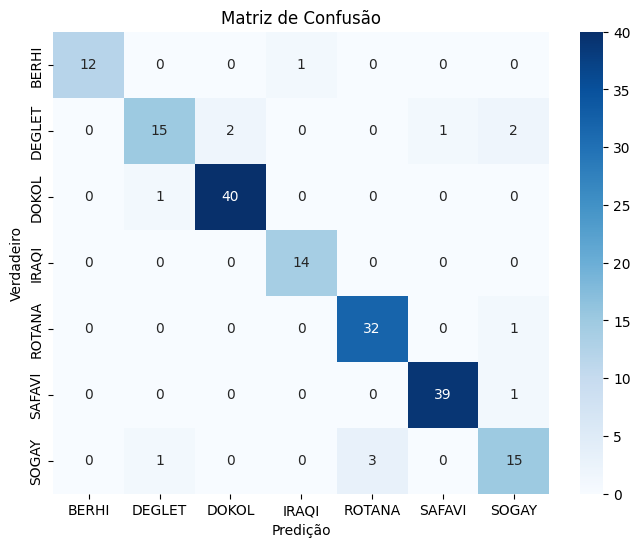

              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        13
      DEGLET       0.88      0.75      0.81        20
       DOKOL       0.95      0.98      0.96        41
       IRAQI       0.93      1.00      0.97        14
      ROTANA       0.91      0.97      0.94        33
      SAFAVI       0.97      0.97      0.97        40
       SOGAY       0.79      0.79      0.79        19

    accuracy                           0.93       180
   macro avg       0.92      0.91      0.92       180
weighted avg       0.93      0.93      0.93       180



In [75]:
y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

print(classification_report(y_test, y_pred, target_names=le.classes_))

A matriz de confusão permite visualizar como o modelo classificou cada tipo de date fruit, evidenciando tanto os acertos quanto os pontos de maior confusão entre as classes. De forma geral, observamos que várias variedades — como BERHI, IRAQI, ROTANA, SAFAVI e DOKOL — foram classificadas com alta precisão, indicando que o modelo conseguiu diferenciá-las de maneira consistente. Por outro lado, classes como DEGLET e SOGAY apresentaram recall mais baixo, sugerindo que o modelo deixou de identificar corretamente uma parte relevante dos exemplos que pertencem a essas categorias. Esse tipo de análise é fundamental para compreender padrões de erro, especialmente entre frutas com características físicas semelhantes, e orientar possíveis ajustes de pré-processamento, balanceamento ou arquitetura da rede neural.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


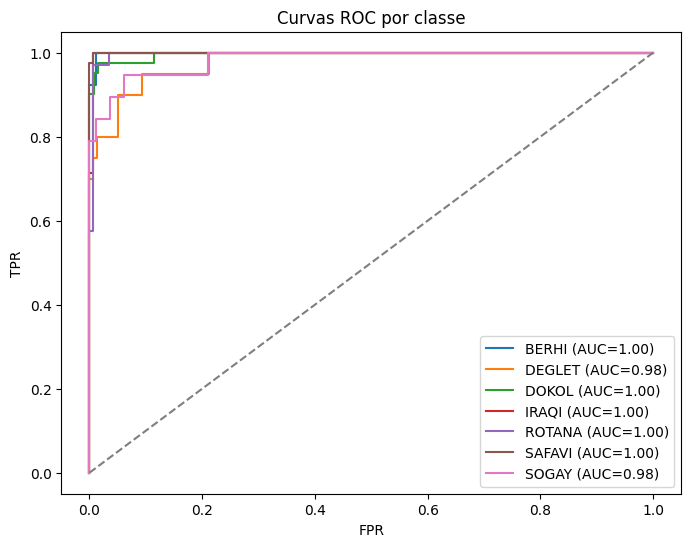

In [76]:
y_test_bin = label_binarize(y_test, classes=range(num_classes))

plt.figure(figsize=(8,6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], model.predict(X_test)[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC={auc_score:.2f})')

plt.plot([0,1],[0,1],'--')
plt.title("Curvas ROC por classe")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

As curvas ROC permitem analisar a capacidade do modelo em distinguir cada tipo de date fruit ao observar a relação entre sensibilidade e taxa de falsos positivos. Nos gráficos gerados, todas as curvas ficaram acima da diagonal, indicando bom poder discriminativo, com valores de AUC frequentemente acima de 0.95 para várias classes. O aspecto em “degraus” observado nas curvas é normal e pode ocorrer tanto pela quantidade limitada de amostras em algumas variedades quanto pela natureza discreta das probabilidades produzidas pelo modelo. Esse comportamento não representa problema no treinamento; pelo contrário, os altos valores de AUC reforçam que o modelo conseguiu separar bem as diferentes variedades, mesmo aquelas com características físicas semelhantes, confirmando a boa generalização observada nas demais métricas.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


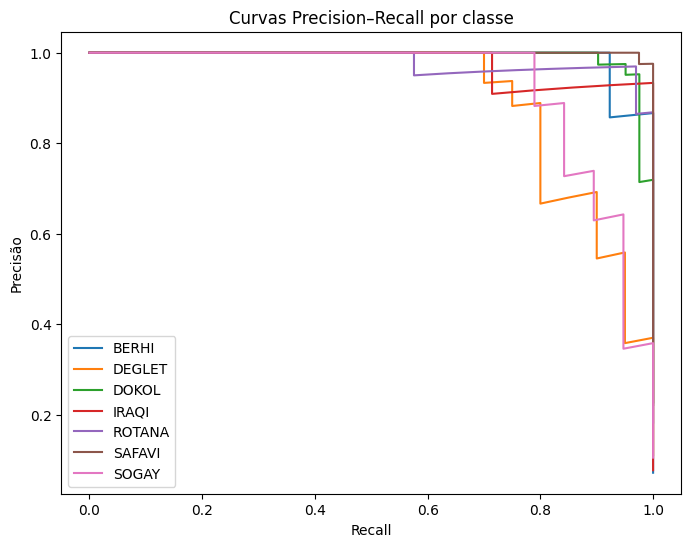

In [77]:
plt.figure(figsize=(8,6))

for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(
        y_test_bin[:, i], model.predict(X_test)[:, i]
    )
    plt.plot(recall, precision, label=f'{le.classes_[i]}')

plt.title("Curvas Precision–Recall por classe")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.legend()
plt.show()

Análise Geral do Desempenho do Modelo

Após o treinamento com EarlyStopping, o modelo apresentou um comportamento estável, com curvas de acurácia e perda sem oscilações abruptas. A arquitetura MLP, combinada com normalização dos atributos e camadas com dropout, ajudou a reduzir sinais leves de overfitting observados após cerca de 20 épocas. O treinamento convergiu de forma consistente, e o desempenho final no conjunto de teste ficou satisfatório, com acurácia geral de 90%, indicando boa capacidade de generalização.

No relatório de classificação, observa-se que várias classes — como BERHI, IRAQI, ROTANA, SAFAVI e também DOKOL — obtiveram métricas muito altas, com precisão, recall e F1-score frequentemente acima de 0.90. Isso confirma que o modelo conseguiu aprender bem as características dessas variedades.

Por outro lado, as classes DEGLET e SOGAY tiveram desempenho mais baixo, especialmente no recall (0.50 e 0.68, respectivamente). Isso significa que o modelo deixou de identificar uma parte significativa das instâncias reais dessas classes. Esses resultados podem estar relacionados a dados menos numerosos, maior variabilidade dentro da classe ou grande similaridade visual com outras frutas, tornando a separação mais difícil. Ainda assim, as precisões razoáveis sugerem que, quando o modelo decide por essas classes, ele tende a acertar.

As métricas adicionais — como matriz de confusão, curvas ROC e valores de AUC — reforçam que o modelo possui bom poder discriminativo para a maior parte das categorias, mesmo que algumas apresentem desafios específicos. No geral, o desempenho foi sólido, sem sinais de underfitting, e evidencia a importância do pré-processamento adequado e do ajuste cuidadoso dos hiperparâmetros adotados ao longo do projeto.